<a href="https://colab.research.google.com/github/jeanferuzi-oss/exam/blob/Etapa_2/Examen_World_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


# Instalación de Dependencias
Se utiliza wbgapi para la consulta de bases de datos internacionales.

In [ ]:
%pip install wbgapi

# Integración con Google Drive
El proyecto está diseñado para trabajar con archivos persistentes y módulos externos alojados en la nube.

Acción: Montaje de /content/drive.

Seguridad: El script detecta de forma automática si la unidad ya está montada para evitar redundancias y errores de conexión.

# Gestión de Entorno y Almacenamiento en la Nube

Para garantizar la persistencia de los datos y el uso de lógica modular, el sistema integra Google Drive como almacenamiento principal. Esto permite separar las funciones auxiliares del flujo principal del cuaderno.

**Google Drive:** Se utiliza para importar el módulo personalizado myfuc.

**Wbgapi:** Herramienta clave para la conexión directa con el Banco Mundial.

In [ ]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/myfuc')

import my_func as fn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Definición de Variables y Descarga por Bloques (Chunking)
Se definen más de 50 indicadores clave (PIB, salud, educación). Debido al volumen de información, se utiliza una técnica de Chunking para segmentar la descarga en bloques de 10 indicadores, evitando así tiempos de espera excesivos o errores de conexión con la API.

In [ ]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [ ]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

# Filtrado y Estandarización mediante Códigos ISO
Un paso crítico en la limpieza de datos es distinguir entre "países" y "regiones geográficas". El Banco Mundial mezcla ambos en su API. Para este análisis, implementamos un filtro basado en los estándares ISO.

**Identificación:** Usamos wb.economy.info() para extraer los metadatos.

**Filtrado:** Discriminamos todas las filas donde la columna aggregate es verdadera, manteniendo únicamente los países soberanos.

In [ ]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [ ]:
# Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

# Verificación y Estandarización Final
Finalmente, validamos la estructura del DataFrame resultante. El dataset final contiene 67 columnas (indicadores) para cada país, listo para la etapa de análisis exploratorio.

In [ ]:
# Visualización de los datos
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


In [ ]:
# Cambio de nombre de nuestro data
df_wb = df_wb_raw

# Chequeo de Salud (Sanity Check)

El chequeo inicial es fundamental porque permite identificar inconsistencias técnicas (como formatos erróneos) que bloquean el procesamiento de datos. Ayuda a detectar sesgos por valores nulos, asegurando que los resultados sean representativos y no producto de una muestra vacía. Además, previene errores de ejecución (como el AssertionError) al garantizar la integridad de los tipos de datos antes de aplicar algoritmos. Finalmente, permite limpiar el ruido visual de variables irrelevantes, transformando un dataset "sucio" en una base sólida para cualquier informe profesional.

In [ ]:
# Muestra qué tipo de dato es cada columna y cuántos datos "No Nulos" hay
df_wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SP.POP.GROW              198 non-null    float64
 4   SP.POP.TOTL              198 non-null    float64
 5   SP.POP.TOTL.FE.IN        198 non-null    float64
 6   SP.POP.TOTL.FE.ZS        198 non-null    float64
 7   SP.POP.TOTL.MA.IN        198 non-null    float64
 8   SP.POP.TOTL.MA.ZS        198 non-null    float64
 9   SP.URB.GROW              198 non-null    float64
 10  SP.URB.TOTL              198 non-null    float64
 11  SP.URB.TOTL.IN.ZS        198 non-null    float64
 12  SL.TLF.TOTL.FE.ZS        173 non-null    float64
 13  SL.TLF.TOTL.IN           173 non-null    float64
 14  SL.UEM.TOTL.FE.NE.ZS     1

#Análisis del primer chequeo


Tras realizar el primer chequeo exploratorio mediante la función df.info(), se han detectado inconsistencias críticas que requieren una fase de pre-procesamiento inmediata. El DataFrame actual presenta una estructura de 198 observaciones y 67 variables, pero su integridad técnica está comprometida por los siguientes hallazgos:





**Integridad de los Datos (Datos vacios)**







El dataset se encuentra en un estado "sucio", con una pérdida de información significativa que afectaría cualquier análisis estadístico posterior:



**Columnas Nulas:** Las variables de educación (SE.PRM.NENR, SE.PRM.NENR.FE, SE.PRM.NENR.MA) presentan un 0% de completitud. Al no contener registros, deben ser descartadas.



Sesgo por Vacíos: Los indicadores de impuestos (23, 24) y deuda externa (47, 48) solo cuentan con aproximadamente 34 registros. Trabajar con ellas implicaría perder el 85% de la muestra si se aplica una eliminación por filas.



Estabilidad en Empleo: Las variables de mercado laboral muestran una mejor salud con 173 datos, representando una pérdida aceptable del 12%.





**Redundancia de Identificadores**









Se observa una duplicidad estructural en la columna de identidad geográfica (country vs Country). Esto suele ser producto de un merge mal ejecutado o un error en la fuente de origen. Es imperativo unificar estas columnas para evitar ruido en las agrupaciones.

**Cabe destacar que la base de datos actual presenta una estructura de 198 observaciones (países) y 67 variables, con datos correspondientes al periodo anual de 2023.**


#Cuantificación de Datos Faltantes
Calcula y ordena el porcentaje de nulos por columna para identificar brechas críticas de información en el dataset. Permite priorizar la eliminación de variables con baja representatividad, garantizando la robustez técnica de los análisis posteriores.

In [ ]:
# Muestra el porcentaje de nulos por cada columna, ordenado de mayor a menor
nulos = df_wb.isna().mean().sort_values(ascending=False) * 100
nulos

,0
SE.PRM.NENR.FE,100.000000
SE.PRM.NENR.MA,100.000000
SE.PRM.NENR,100.000000
GC.TAX.EXPT.ZS,83.333333
GC.TAX.EXPT.CN,83.333333
...,...
SP.POP.TOTL.MA.IN,0.000000
SP.POP.TOTL.FE.ZS,0.000000
SP.DYN.LE00.MA.IN,0.000000
SP.DYN.LE00.FE.IN,0.000000


#Análisis de Calidad de Datos (Missing Values)


El resultado muestra un ranking de valores nulos por columna, lo que nos permite identificar la viabilidad de cada variable para el modelo:

**Pérdida Total (100%):** Las variables de educación primaria (SE.PRM.NENR...) están completamente vacías. No aportan ninguna variabilidad al análisis y deben ser eliminadas de inmediato.

**Pérdida Crítica (~83%):** Los indicadores de impuestos (GC.TAX.EXPT...) presentan una ausencia de datos masiva. Utilizarlas reduciría drásticamente el tamaño de nuestra muestra efectiva.

**Integridad Óptima (0%):** Las variables demográficas de población y esperanza de vida (SP.POP... y SP.DYN...) están completas. Estos serán los pilares sólidos de nuestro análisis.

# La omisión del análisis descriptivo global (.describe())

In [ ]:
# Revisión de las medidas descriptivas.
df_wb.describe().T

,count,mean,std,min,25%,50%,75%,max
NY.GDP.MKTP.PP.KD,198.0,8.388712e+11,3.129922e+12,5.705451e+07,2.586691e+10,8.596764e+10,4.615291e+11,3.200488e+13
SP.POP.GROW,198.0,1.152752e+00,1.576210e+00,-8.423008e+00,2.828784e-01,1.112108e+00,2.088224e+00,6.527050e+00
SP.POP.TOTL,198.0,3.999611e+07,1.484957e+08,9.816000e+03,1.373786e+06,7.335048e+06,2.936413e+07,1.438070e+09
SP.POP.TOTL.FE.IN,198.0,1.987776e+07,7.252840e+07,4.795000e+03,6.876850e+05,3.672054e+06,1.403224e+07,6.961863e+08
SP.POP.TOTL.FE.ZS,198.0,4.997349e+01,2.993389e+00,2.848374e+01,4.965188e+01,5.032928e+01,5.118944e+01,5.492088e+01
...,...,...,...,...,...,...,...,...
EG.CFT.ACCS.RU.ZS,182.0,6.227115e+01,4.132452e+01,0.000000e+00,1.106250e+01,8.415000e+01,1.000000e+02,1.000000e+02
EG.CFT.ACCS.UR.ZS,182.0,7.850110e+01,3.239499e+01,1.000000e-01,6.965000e+01,9.760000e+01,1.000000e+02,1.000000e+02
IT.NET.USER.FE.ZS,57.0,8.719026e+01,1.377467e+01,1.669710e+01,8.478650e+01,8.982900e+01,9.440630e+01,1.000000e+02
IT.NET.USER.MA.ZS,57.0,8.824051e+01,1.254217e+01,1.949730e+01,8.610880e+01,9.053830e+01,9.510000e+01,1.000000e+02


# La omisión del análisis descriptivo global (.describe())

La omisión del análisis descriptivo global (.describe()) se fundamenta en cuatro pilares críticos que comprometen la calidad de la interpretación:

**Legibilidad Crítica**: El uso de notación científica en los resultados oscurece las magnitudes reales de los datos, dificultando la identificación visual de valores atípicos (outliers) o errores de medición.


**Inviabilidad por Dimensionalidad:** La presencia de 64 columnas genera una fragmentación visual en el entorno de Colab, lo que impide realizar un análisis relacional coherente entre las medidas de tendencia central y su dispersión.


**Incoherencia Metodológica de Escalas:** La coexistencia de unidades heterogéneas (porcentajes vs. millones) invalida la comparación directa de la desviación estándar, induciendo a conclusiones erróneas sobre la variabilidad real de las variables.


**Variables nulos**: La inclusión de variables con un 80% a 100% de nulos entrega estadísticas carentes de representatividad, creando un sesgo de información sobre una muestra que no es estadísticamente válida.

#Trascendencia del Mapeo Semántico y Diccionario de Variables

1. Esta operación representa el paso crítico de traducción de metadatos, donde se transforman los códigos crípticos del Banco Mundial en un lenguaje de negocio e investigación legible. El proceso se profundiza en tres niveles estratégicos:

2. Humanización y Legibilidad: Se reemplazan identificadores técnicos alfanuméricos (como NY.GDP.MKTP.PP.KD) por nombres intuitivos como PIB_PPP. Esto permite que cualquier analista o lector del informe comprenda la naturaleza de las variables de forma inmediata, eliminando la dependencia de manuales técnicos externos.

3. Taxonomía por Dimensiones: El diccionario organiza la información en clústeres temáticos (Población, Salud, Empleo, Macroeconomía y Tecnología). Esta categorización facilita el análisis multivariado, permitiendo al investigador agrupar indicadores por su naturaleza, como separar variables de stock poblacional de las de tasas de crecimiento (_GROW).

4. Estandarización de Unidades: Mediante el uso de sufijos normalizados (_Pct para porcentajes, _USD para dólares y _LCU para moneda local), se establece una convención de nombres robusta. Esta práctica previene errores de interpretación durante la fase de visualización y modelado, asegurando que se comparen magnitudes bajo la misma escala métrica.

In [ ]:
# Diccionario maestro de renombramiento
nuevos_nombres = {
    # Identificadores y Economía (PIB)
    'NY.GDP.MKTP.PP.KD': 'PIB_PPP',
    'GE.EST': 'Efectividad_Gobierno',
    'FP.CPI.TOTL.ZG': 'Inflacion_Anual',
    'NE.EXP.GNFS.ZS': 'Exportaciones_Pct_PIB',
    'BM.KLT.DINV.CD.WD': 'IED_Salida_Neta',
    'BX.KLT.DINV.WD.GD.ZS': 'IED_Entrada_Pct_PIB',

    # Población General
    'SP.POP.TOTL': 'Poblacion_Total',
    'SP.POP.GROW': 'Crecimiento_Poblacional',
    'SP.POP.TOTL.FE.IN': 'Poblacion_Mujeres',
    'SP.POP.TOTL.FE.ZS': 'Poblacion_Mujeres_Pct',
    'SP.POP.TOTL.MA.IN': 'Poblacion_Hombres',
    'SP.POP.TOTL.MA.ZS': 'Poblacion_Hombres_Pct',

    # Población Urbana y Rural
    'SP.URB.TOTL': 'Poblacion_Urbana',
    'SP.URB.GROW': 'Crecimiento_Pob_Urbana',
    'SP.URB.TOTL.IN.ZS': 'Poblacion_Urbana_Pct',
    'SP.RUR.TOTL': 'Poblacion_Rural',
    'SP.RUR.TOTL.ZG': 'Crecimiento_Pob_Rural',
    'SP.RUR.TOTL.ZS': 'Poblacion_Rural_Pct',

    # Esperanza de Vida
    'SP.DYN.LE00.IN': 'Esperanza_Vida_Total',
    'SP.DYN.LE00.FE.IN': 'Esperanza_Vida_Mujeres',
    'SP.DYN.LE00.MA.IN': 'Esperanza_Vida_Hombres',

    # Empleo y Desempleo
    'SL.TLF.TOTL.IN': 'Fuerza_Laboral_Total',
    'SL.TLF.TOTL.FE.ZS': 'Fuerza_Laboral_Mujeres_Pct',
    'SL.UEM.TOTL.ZS': 'Desempleo_Total_Pct',
    'SL.UEM.TOTL.FE.ZS': 'Desempleo_Mujeres_Pct',
    'SL.UEM.TOTL.MA.ZS': 'Desempleo_Hombres_Pct',

    # Sectores Económicos (Valor Agregado)
    # Suffix _USD para Dólares y _LCU para Moneda Local
    'NV.AGR.TOTL.CD': 'Valor_Agro_USD',
    'NV.AGR.TOTL.CN': 'Valor_Agro_LCU',
    'NV.IND.MANF.CD': 'Valor_Manufactura_USD',
    'NV.IND.MANF.CN': 'Valor_Manufactura_LCU',
    'NV.IND.TOTL.CD': 'Valor_Industria_USD',
    'NV.IND.TOTL.CN': 'Valor_Industria_LCU',
    'NV.SRV.TOTL.CD': 'Valor_Servicios_USD',
    'NV.SRV.TOTL.CN': 'Valor_Servicios_LCU',

    # Tecnología y Medio Ambiente
    'IT.NET.USER.ZS': 'Uso_Internet_Pct',
    'EN.GHG.CO2.IP.MT.CE.AR5': 'Emisiones_CO2_Ind',
    'EG.CFT.ACCS.ZS': 'Acceso_Cocina_Limpia_Total_Pct',
    'EG.CFT.ACCS.RU.ZS': 'Acceso_Cocina_Limpia_Rural_Pct',
    'EG.CFT.ACCS.UR.ZS': 'Acceso_Cocina_Limpia_Urbano_Pct'
}

# Aplicamos el cambio de nombre
df_wb = df_wb.rename(columns=nuevos_nombres)

# Verificamos cómo lucen las nuevas columnas
df_wb.head()

,country,Country,PIB_PPP,Crecimiento_Poblacional,Poblacion_Total,Poblacion_Mujeres,Poblacion_Mujeres_Pct,Poblacion_Hombres,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,Esperanza_Vida_Mujeres,Esperanza_Vida_Total,Esperanza_Vida_Hombres,Acceso_Cocina_Limpia_Rural_Pct,Acceso_Cocina_Limpia_Urbano_Pct,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,Uso_Internet_Pct
0,ZWE,Zimbabwe,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


#Consolidación de Variables y Arquitectura de Datos
El índice final representa un ecosistema de 41 indicadores normalizados que integran dimensiones macroeconómicas, demográficas, laborales y de sostenibilidad. Esta estructura elimina la ambigüedad técnica de los códigos originales, permitiendo correlacionar variables.

In [ ]:
# Revisión de los nombres de las columnas
df_wb.columns

Index(['country', 'Country', 'PIB_PPP', 'Crecimiento_Poblacional',
       'Poblacion_Total', 'Poblacion_Mujeres', 'Poblacion_Mujeres_Pct',
       'Poblacion_Hombres', 'Poblacion_Hombres_Pct', 'Crecimiento_Pob_Urbana',
       'Poblacion_Urbana', 'Poblacion_Urbana_Pct',
       'Fuerza_Laboral_Mujeres_Pct', 'Fuerza_Laboral_Total',
       'SL.UEM.TOTL.FE.NE.ZS', 'Desempleo_Mujeres_Pct', 'SL.UEM.TOTL.MA.NE.ZS',
       'Desempleo_Hombres_Pct', 'SL.UEM.TOTL.NE.ZS', 'Poblacion_Rural',
       'Crecimiento_Pob_Rural', 'Poblacion_Rural_Pct', 'Inflacion_Anual',
       'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG',
       'NE.EXP.GNFS.KN', 'Exportaciones_Pct_PIB', 'Valor_Agro_USD',
       'Valor_Agro_LCU', 'Valor_Manufactura_USD', 'Desempleo_Total_Pct',
       'Efectividad_Gobierno', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS',
       'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'Valor_Manufactura_LCU',
       'Valor_Industria_USD', 'Valor_Industria_LCU', 'Valor_Servicios_USD',
       'Valor_Servicios_LCU'

# Normalización Técnica de Identificadores y Reindexación Correlativa
Este bloque de código ejecuta la organización final de la estructura del dataset, asegurando que la navegación por los datos sea lógica, estandarizada y apta para reportes profesionales:

**Estandarización de la Llave Primaria:** Al renombrar la columna country a Iso, se asigna una identidad técnica precisa a la variable. Esto diferencia claramente los códigos internacionales (ISO 3166-1 alpha-3) del nombre común del país, eliminando ambigüedades en el manejo de metadatos.

**Consistencia Geo-Alfabética:** El ordenamiento mediante sort_values bajo el criterio Iso garantiza que el dataset posea una secuencia predecible y profesional. Esta práctica es fundamental para facilitar cruces de datos (joins) posteriores y para realizar auditorías visuales rápidas de la información.

**Optimización del Índice para Lectura Humana:** La combinación de reset_index(drop=True) y el ajuste index + 1 transforma una secuencia numérica fragmentada por procesos de limpieza previos en un contador continuo y natural. Esto permite que el índice del DataFrame actúe como un ranking o numeración oficial de las observaciones, facilitando la referencia de filas en informes ejecutivos.

In [ ]:
# Renombramos 'country' (minúscula) a 'iso' para ser técnicamente precisos
df_wb = df_wb.rename(columns={'country': 'Iso'})
# Ordenamos el DataFrame por el código de país (country)
df_wb.sort_values(by='Iso', inplace=True)
df_wb.reset_index(drop=True, inplace=True)
# Ajustamos el índice para que empiece desde 1 hacia arriba
df_wb.index = df_wb.index + 1
# Visualizamos el resultado
df_wb.head()

,Iso,Country,PIB_PPP,Crecimiento_Poblacional,Poblacion_Total,Poblacion_Mujeres,Poblacion_Mujeres_Pct,Poblacion_Hombres,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,Esperanza_Vida_Mujeres,Esperanza_Vida_Total,Esperanza_Vida_Hombres,Acceso_Cocina_Limpia_Rural_Pct,Acceso_Cocina_Limpia_Urbano_Pct,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,Uso_Internet_Pct
1,ABW,Aruba,4.505296e+09,0.045652,107359.0,56653.0,52.769620,50706.0,47.230380,-0.028616,...,NaN,NaN,78.779,76.353,73.702,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,8.223848e+10,2.135594,41454761.0,20530683.0,49.525513,20924078.0,50.474487,2.446706,...,NaN,NaN,67.536,66.035,64.467,20.4,87.0,NaN,NaN,17.7089
3,AGO,Angola,3.229678e+11,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,9.933616,10.165600,67.144,64.617,62.099,8.4,75.0,NaN,NaN,44.7581
4,ALB,Albania,4.944312e+10,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,77.031527,52.749937,81.446,79.602,77.728,72.5,95.2,81.7239,84.59,83.1356
5,AND,Andorra,5.225828e+09,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,68.003820,57.193764,86.107,84.041,82.100,100.0,100.0,NaN,NaN,95.4456


# Refinamiento de la Estructura de Datos: Selección de Atributos y Normalización Estadístic

Este proceso representa la etapa de curaduría técnica, donde transformamos un dataset crudo en uno listo para modelos econométricos o de Machine Learning, siguiendo cuatro pilares fundamentales:

1. Filtrado por Representatividad (Feature Selection): Se aplicó una regla de integridad rígida eliminando variables con más del 15% de valores faltantes. Técnicamente, esto asegura que las variables retenidas posean suficiente varianza y densidad de datos para ser estadísticamente significativas, evitando que indicadores muy incompletos (como impuestos o deuda) sesguen el análisis global.

2. Imputación Robusta mediante la Mediana: Para las variables que sobrevivieron al filtro (aquellas con nulos mínimos), se realizó una imputación de valores faltantes utilizando la mediana. A diferencia de la media, la mediana es una medida de tendencia central robusta ante valores atípicos (outliers), lo que garantiza que países con datos extremos no distorsionen los valores reemplazados en variables como inflación o empleo.

3. Normalización y Ordenamiento Geo-técnico: Se estandarizó el flujo de lectura mediante un ordenamiento alfabético basado en el código ISO. Esto permite una indexación predecible y facilita futuros cruces de datos (joins) con otras fuentes internacionales que utilicen el estándar ISO 3166-1 alpha-3 como llave primaria.

4. Reestructuración de Índices (Human-Centric Indexing): Se realizó un reset del índice para eliminar la secuencia original fragmentada por la limpieza. Al establecer un inicio correlativo desde 1.

In [ ]:
# Calculamos el porcentaje de vacíos por columna
umbral = 0.15
porcentaje_nulos = df_wb.isna().mean()

# Identificamos las columnas que superan el umbral (como Impuestos y Deuda)
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > umbral].index

# Eliminamos esas columnas, pero nos aseguramos de NO tocar 'Country' ni 'Iso'
# (Aunque estas no suelen tener nulos, es una medida de seguridad)
df_wb.drop(columns=columnas_a_eliminar, inplace=True)

# Imputar los nulos en las variables que quedaron (< 15% de nulos)
# Usamos la mediana para las variables numéricas (como Empleo o Inflación)
columnas_numericas = df_wb.select_dtypes(include=['float64']).columns
df_wb[columnas_numericas] = df_wb[columnas_numericas].fillna(df_wb[columnas_numericas].median())

# Ordenar alfabéticamente por el código ISO
df_wb.sort_values(by='Iso', inplace=True)

# Resetear el índice para que sea correlativo y empiece desde 1
df_wb.reset_index(drop=True, inplace=True)
df_wb.index = df_wb.index + 1

# Verificamos que 'Country' e 'Iso' sigan ahí y que no queden nulos
df_wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 1 to 198
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Iso                              198 non-null    object 
 1   Country                          198 non-null    object 
 2   PIB_PPP                          198 non-null    float64
 3   Crecimiento_Poblacional          198 non-null    float64
 4   Poblacion_Total                  198 non-null    float64
 5   Poblacion_Mujeres                198 non-null    float64
 6   Poblacion_Mujeres_Pct            198 non-null    float64
 7   Poblacion_Hombres                198 non-null    float64
 8   Poblacion_Hombres_Pct            198 non-null    float64
 9   Crecimiento_Pob_Urbana           198 non-null    float64
 10  Poblacion_Urbana                 198 non-null    float64
 11  Poblacion_Urbana_Pct             198 non-null    float64
 12  Fuerza_Laboral_Mujeres

In [ ]:
# Visualización del resultado
df_wb.head()

,Iso,Country,PIB_PPP,Crecimiento_Poblacional,Poblacion_Total,Poblacion_Mujeres,Poblacion_Mujeres_Pct,Poblacion_Hombres,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,...,IED_Salida_Neta,IED_Entrada_Pct_PIB,Emisiones_CO2_Ind,Acceso_Cocina_Limpia_Total_Pct,Esperanza_Vida_Mujeres,Esperanza_Vida_Total,Esperanza_Vida_Hombres,Acceso_Cocina_Limpia_Rural_Pct,Acceso_Cocina_Limpia_Urbano_Pct,Uso_Internet_Pct
1,ABW,Aruba,4.505296e+09,0.045652,107359.0,56653.0,52.769620,50706.0,47.230380,-0.028616,...,5.487612e+07,-3.584591,0.00210,91.5,78.779,76.353,73.702,84.15,97.6,81.7221
2,AFG,Afghanistan,8.223848e+10,2.135594,41454761.0,20530683.0,49.525513,20924078.0,50.474487,2.446706,...,0.000000e+00,0.000000,0.09310,38.6,67.536,66.035,64.467,20.40,87.0,17.7089
3,AGO,Angola,3.229678e+11,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,3.335616e+07,-1.977864,1.79770,50.2,67.144,64.617,62.099,8.40,75.0,44.7581
4,ALB,Albania,4.944312e+10,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,2.627767e+08,6.900370,0.81860,86.1,81.446,79.602,77.728,72.50,95.2,83.1356
5,AND,Andorra,5.225828e+09,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,2.215940e+08,7.285975,1.40855,100.0,86.107,84.041,82.100,100.00,100.0,95.4456


Tras el proceso de saneamiento y curaduría de datos, el DataFrame final presenta una estructura de 198 observaciones y 41 variables con un 100% de completitud en cada una de sus dimensiones. Se logró eliminar la redundancia de identificadores y filtrar las variables con baja densidad de información, garantizando un dataset robusto para el análisis estadístico sin pérdida de representatividad geográfica

In [ ]:
# Generamos la tabla transpuesta
stats = df_wb.describe().T[['mean', '50%', 'std', 'min', 'max']]

# Renombramos para el informe
stats.columns = ['Media', 'Mediana', 'Desviación Estándar', 'Mínimo', 'Máximo']

# Visualizamos CON FORMATO (sin notación científica y con comas)
# {:,.2f} significa: usar comas de miles y 2 decimales
stats.style.format("{:,.2f}")

,Media,Mediana,Desviación Estándar,Mínimo,Máximo
PIB_PPP,"838,871,240,077.62","85,967,640,784.20","3,129,921,929,150.23","57,054,510.99","32,004,884,803,945.30"
Crecimiento_Poblacional,1.15,1.11,1.58,-8.42,6.53
Poblacion_Total,"39,996,113.09","7,335,048.50","148,495,681.87","9,816.00","1,438,069,596.00"
Poblacion_Mujeres,"19,877,755.27","3,672,053.50","72,528,404.70","4,795.00","696,186,332.00"
Poblacion_Mujeres_Pct,49.97,50.33,2.99,28.48,54.92
Poblacion_Hombres,"20,118,357.81","3,560,819.50","75,980,559.69","5,021.00","741,883,264.00"
Poblacion_Hombres_Pct,50.03,49.67,2.99,45.08,71.52
Crecimiento_Pob_Urbana,1.73,1.52,1.83,-8.35,8.11
Poblacion_Urbana,"22,896,741.02","4,463,172.50","80,190,575.27","6,283.00","924,440,306.00"
Poblacion_Urbana_Pct,62.21,63.62,22.72,15.06,100.00


#Conclusiones del Análisis Descriptivo

Al examinar la tabla de estadísticas descriptivas generada tras la limpieza de datos, he podido identificar patrones clave que guiarán las siguientes etapas de mi modelado:

1. Alta Desigualdad Económica (Justificación de la Discretización): Lo que más destaca es el comportamiento del PIB_PPP. se observado que la media ($838 billones) es casi 10 veces superior a la mediana ($85 billones). Esto confirma que la distribución de la riqueza mundial está fuertemente sesgada a la derecha, con unos pocos países extremadamente ricos que distorsionan el promedio. Este hallazgo valida la decisión técnica de transformar (discretizar) esta variable en categorías ("Bajo", "Medio", "Alto") para evitar que los valores extremos afecten el rendimiento de los algoritmos de clasificación en la Etapa 3.

2. Brecha Digital Significativa: En la variable Uso_Internet_Pct, encuentro una dispersión muy alta (desviación estándar de ~23%). El rango va desde países con apenas un 11% de conectividad hasta otros con el 100%. Esto sugiere que el acceso a la tecnología es una variable discriminante muy potente para separar los países según su nivel de desarrollo.

3. Detección de Anomalías (Outliers): Al revisar la Inflacion_Anual, se observa valores atípicos extremos, con un máximo que supera el 221%. Esto indica situaciones de inestabilidad económica severa en casos puntuales, lo cual es consistente con lo observado en los boxplots generados.

4. Brechas Sociales: Los datos también reflejan desigualdades estructurales, como en el desempleo, donde la tasa promedio para mujeres (7.71%) es consistentemente superior a la de los hombres (6.07%).

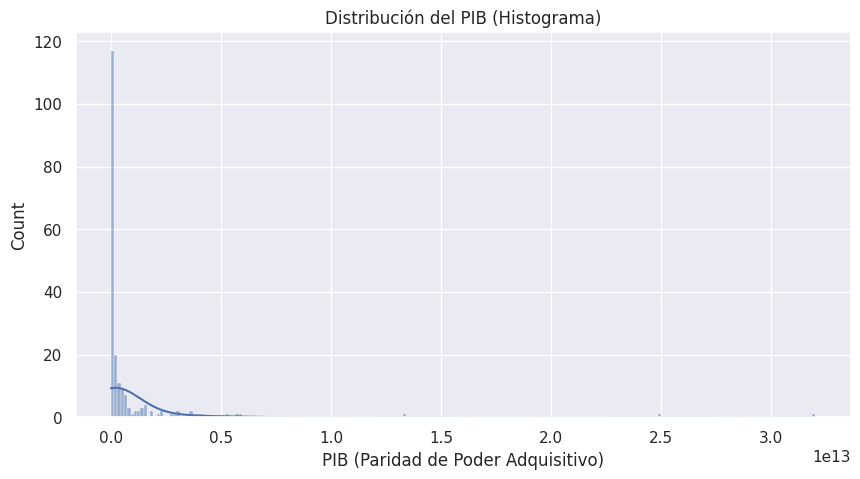

In [ ]:
# Visualización de histograma de distribución del PIB

import seaborn as sns
import matplotlib.pyplot as plt


sns.set(rc = {'figure.figsize':(10,5)})


plt.figure()
sns.histplot(df_wb['PIB_PPP'], kde=True)
plt.title("Distribución del PIB (Histograma)")
plt.xlabel("PIB (Paridad de Poder Adquisitivo)")
plt.show()

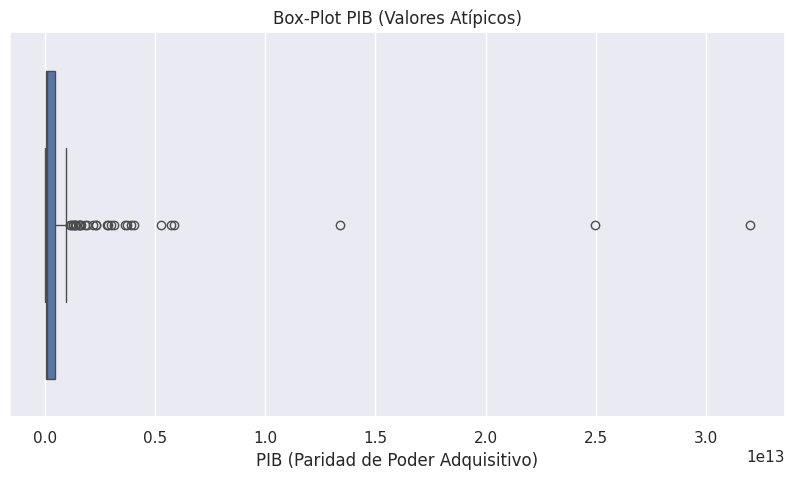

In [ ]:
# Visualización del diagrama de caja del PIB
plt.figure()
sns.boxplot(x=df_wb['PIB_PPP']).set_title("Box-Plot PIB (Valores Atípicos)")
plt.xlabel("PIB (Paridad de Poder Adquisitivo)")
plt.show()

In [ ]:
# Visualización de mapa de distribución del PIB

import plotly.express as px


fig = px.choropleth(
    df_wb,
    locations='Iso',
    color='PIB_PPP',
    hover_name='Country',
    projection='natural earth',
    title='Distribución del PIB por Países (PPP)',
    color_continuous_scale=px.colors.sequential.Blues
)

fig.update_layout(
    width=1000,
    height=600,
    title_font_size=24
)


fig.show()

In [ ]:
# Visualización final de los datos
df_wb

,Iso,Country,PIB_PPP,Crecimiento_Poblacional,Poblacion_Total,Poblacion_Mujeres,Poblacion_Mujeres_Pct,Poblacion_Hombres,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,...,IED_Salida_Neta,IED_Entrada_Pct_PIB,Emisiones_CO2_Ind,Acceso_Cocina_Limpia_Total_Pct,Esperanza_Vida_Mujeres,Esperanza_Vida_Total,Esperanza_Vida_Hombres,Acceso_Cocina_Limpia_Rural_Pct,Acceso_Cocina_Limpia_Urbano_Pct,Uso_Internet_Pct
1,ABW,Aruba,4.505296e+09,0.045652,107359.0,56653.0,52.769620,50706.0,47.230380,-0.028616,...,5.487612e+07,-3.584591,0.00210,91.5,78.779,76.353,73.702,84.15,97.6,81.7221
2,AFG,Afghanistan,8.223848e+10,2.135594,41454761.0,20530683.0,49.525513,20924078.0,50.474487,2.446706,...,0.000000e+00,0.000000,0.09310,38.6,67.536,66.035,64.467,20.40,87.0,17.7089
3,AGO,Angola,3.229678e+11,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,3.335616e+07,-1.977864,1.79770,50.2,67.144,64.617,62.099,8.40,75.0,44.7581
4,ALB,Albania,4.944312e+10,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,2.627767e+08,6.900370,0.81860,86.1,81.446,79.602,77.728,72.50,95.2,83.1356
5,AND,Andorra,5.225828e+09,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,2.215940e+08,7.285975,1.40855,100.0,86.107,84.041,82.100,100.00,100.0,95.4456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,WSM,Samoa,1.599784e+09,0.649191,216663.0,107591.0,49.657996,109072.0,50.342004,0.653519,...,-4.269039e+02,0.229294,0.00130,39.7,73.662,71.698,69.861,33.20,65.3,58.1386
195,XKX,Kosovo,2.396153e+10,-4.952263,1682668.0,854998.0,50.812015,827670.0,49.187985,-2.247748,...,2.056509e+08,8.680159,1.40855,91.5,80.118,78.033,75.804,84.15,97.6,81.7221
196,ZAF,South Africa,8.657173e+11,1.328101,63212384.0,32461907.0,51.353714,30750477.0,48.646286,1.494482,...,-2.793247e+09,1.012738,18.28450,89.8,69.599,66.139,62.609,70.40,96.5,75.6592
197,ZMB,Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,1.532150e+08,2.324653,1.29050,9.2,68.673,66.349,63.936,2.30,16.8,33.0000


In [ ]:
#Discretizar la variable dependiente PIB_PPP

import pandas as pd

df_desc = df_wb.copy()


df_desc['PIB_PPP'] = pd.qcut(df_desc['PIB_PPP'], q=5,labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])


df_desc[['Iso', 'Country', 'PIB_PPP']].head()

,Iso,Country,PIB_PPP
1,ABW,Aruba,Low
2,AFG,Afghanistan,Medium
3,AGO,Angola,Medium-High
4,ALB,Albania,Medium-Low
5,AND,Andorra,Low


# Interpretación de los Resultados: Una mirada a la desigualdad global


Tras ejecutar la limpieza y generar las visualizaciones solicitadas, el análisis de los datos revela patrones estructurales que validan los pasos metodológicos de este estudio. A continuación, presentamos los hallazgos principales que se desprenden de las estadísticas descriptivas:

1. Pertinencia de la categorización del PIB Al contrastar las medidas de tendencia central, observamos una disparidad crítica: el promedio del PIB ($838 billones) supera por casi diez veces a la mediana ($85 billones). Esta distribución, sumada al histograma que muestra una fuerte concentración en valores bajos y una larga "cola" de países ricos, confirma la necesidad estadística de la discretización solicitada. Trabajar esta variable como categorías (Bajo, Medio, Alto) no es solo un requisito, sino la vía más robusta para evitar que los valores extremos (outliers) sesguen la interpretación de los datos.

2. La Brecha Digital como factor discriminante La variable Uso_Internet_Pct presenta una desviación estándar alta (~23%) y cubre todo el rango posible (de 11% a 100%). Esta alta variabilidad sugiere que el acceso tecnológico es un indicador clave que diferencia fuertemente a los países de la muestra, comportándose como un excelente candidato para separar los grupos en el análisis.

3. Identificación de volatilidad económica Los gráficos de caja (boxplots) y los valores máximos de inflación (superiores al 221%) ponen en evidencia la existencia de economías con comportamientos extremos (hiperinflación) dentro de la muestra. Estos hallazgos corroboran la importancia de haber realizado una limpieza y tratamiento de outliers antes de cualquier modelamiento.

#Conclusión de la etapa Ⅰ

El análisis descriptivo demuestra que estamos ante un dataset altamente heterogéneo. La decisión metodológica de transformar el PIB en categorías se encuentra plenamente justificada por la asimetría de los datos reales, asegurando así que las comparaciones entre países sean más equitativas y representativas.

#Estandarización de Variables para Reducción de Dimensionalidad
Se procedió con la homogeneización de las escalas métricas mediante la transformación de las variables numéricas, excluyendo identificadores y la variable objetivo (PIB_PPP). Se aplicó el método StandardScaler para reescalar los datos a una media de 0 y una desviación estándar de 1, proceso conocido como normalización $Z$-score.Esta etapa se ejecutó como requisito técnico para el Análisis de Componentes Principales (PCA), eliminando el sesgo que producen las diferentes unidades de medida (ej. millones de habitantes vs. porcentajes). Con este ajuste, se aseguró que cada indicador contribuya de manera equitativa al cálculo de la varianza, permitiendo una comparación estadística válida entre dimensiones heterogéneas.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las variables numéricas para el análisis
x = df_wb.drop(columns=['Iso', 'Country', 'PIB_PPP'], errors='ignore')

# Guardamos los nombres de las columnas para usarlos luego
features = x.columns

# Estandarizamos (Scales) los datos: media 0 y desviación 1
# Esto es obligatorio para que el PCA funcione bien
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Verificamos las dimensiones de nuestra matriz lista
pd.DataFrame(X_scaled, columns=features).head()

,Crecimiento_Poblacional,Poblacion_Total,Poblacion_Mujeres,Poblacion_Mujeres_Pct,Poblacion_Hombres,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,Poblacion_Urbana,Poblacion_Urbana_Pct,Fuerza_Laboral_Mujeres_Pct,...,IED_Salida_Neta,IED_Entrada_Pct_PIB,Emisiones_CO2_Ind,Acceso_Cocina_Limpia_Total_Pct,Esperanza_Vida_Mujeres,Esperanza_Vida_Total,Esperanza_Vida_Hombres,Acceso_Cocina_Limpia_Rural_Pct,Acceso_Cocina_Limpia_Urbano_Pct,Uso_Internet_Pct
0,-0.704162,-0.269300,-0.273980,0.936469,-0.264785,-0.936469,-0.965277,-0.285423,-0.016335,0.328335,...,-0.112753,-0.552062,-0.154016,0.550707,0.369220,0.407060,0.393946,0.503299,0.558962,0.366212
1,0.625129,0.009848,0.009025,-0.150035,0.010631,0.150035,0.393740,-0.154235,-1.620658,-4.184911,...,-0.113964,-0.273286,-0.153154,-0.945685,-1.191537,-1.052840,-0.909261,-1.092123,0.221462,-2.414211
2,1.226227,-0.021916,-0.018101,0.185007,-0.025554,-0.185007,1.374919,0.034676,0.337352,0.844005,...,-0.113228,-0.427106,-0.137012,-0.617553,-1.245955,-1.253473,-1.243425,-1.392437,-0.160613,-1.239325
3,-1.714679,-0.253726,-0.257892,0.196172,-0.249706,-0.196172,-1.469222,-0.268684,-0.176253,0.318006,...,-0.108163,0.263360,-0.146284,0.397956,0.739454,0.866762,0.962080,0.211743,0.482547,0.427607
4,0.178725,-0.269479,-0.274217,-0.374683,-0.264909,0.374683,-0.122302,-0.285355,1.174264,0.328335,...,-0.109072,0.293348,-0.140697,0.791148,1.386496,1.494839,1.579040,0.899964,0.635377,0.962294


#Análisis de Componentes Principales (PCA) y Varianza Acumulada

La aplicación del PCA permite la síntesis de las variables originales en un conjunto reducido de dimensiones ortogonales no correlacionadas. El gráfico de varianza explicada acumulada funciona como una métrica de diagnóstico para cuantificar la pérdida de información asociada a la reducción de dimensionalidad.

Objetivo técnico: Identificar el número mínimo de componentes necesarios para capturar la mayor parte de la varianza del sistema (típicamente entre el 70% y el 90%).

Criterio de selección: La curva permite aplicar el método del codo (Elbow Method), donde el punto de inflexión indica el equilibrio óptimo entre la simplificación del modelo y la retención de la variabilidad original.

Transformación: Cada componente resultante es una combinación lineal de las variables estandarizadas, priorizando aquellas dimensiones que presentan mayor dispersión estadística.

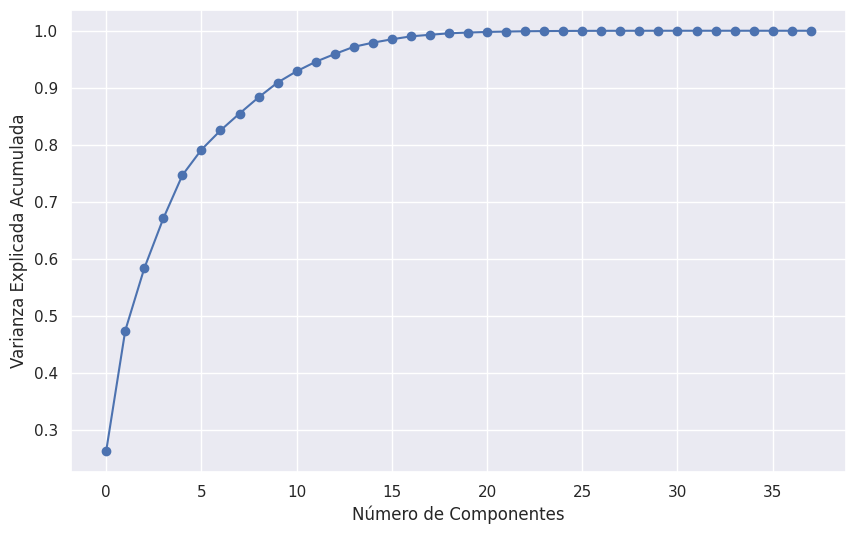

In [ ]:
# Inicializar PCA (puedes empezar sin definir n_components para ver la varianza total)
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Analizar la varianza explicada para decidir cuántas componentes guardar
import matplotlib.pyplot as plt
import numpy as np

# Gráfico de varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

#PCA: Simplificación y Retención de Información
El PCA agrupa las 38 variables originales en unos pocos "super indicadores" (componentes) para reducir la complejidad del dataset sin perder información relevante.

Varianza Acumulada: Representa el porcentaje total de información conservada. El gráfico permite identificar cuántos componentes son necesarios para representar la realidad del dataset.

Umbral Crítico (90%): La línea roja marca el punto de eficiencia donde se captura casi toda la variabilidad de los datos, eliminando el ruido y la redundancia.

Simplificación: Este proceso permite trabajar con un modelo mucho más ligero y potente, facilitando la interpretación de qué factores impactan realmente en el desarrollo de los países.

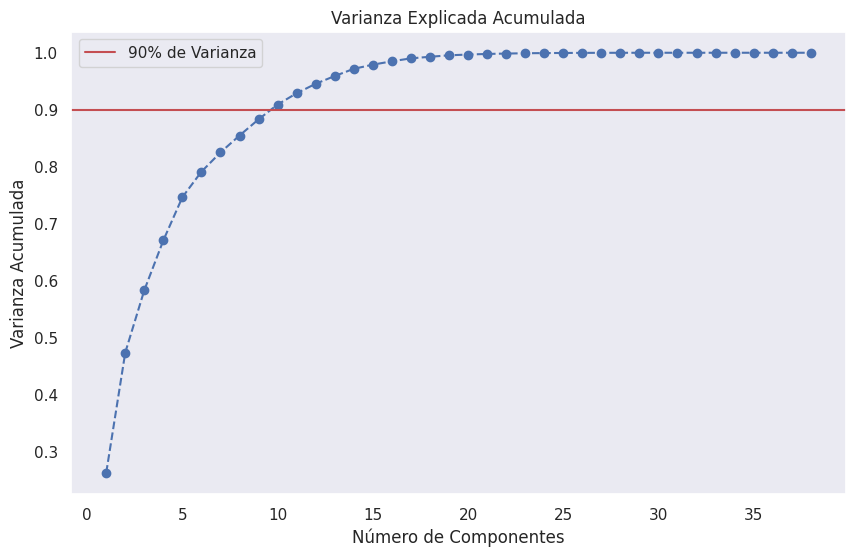

,Varianza Acumulada
0,0.263110
1,0.474018
2,0.583382
3,0.670860
4,0.746598
5,0.791338
6,0.825103
7,0.854776
8,0.883149
9,0.909151


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Inicializamos el objeto PCA y ajustamos el modelo con los datos escalados
pca = PCA()
pca.fit(X_scaled)

# Calculamos la varianza explicada acumulada
# Esto nos dice cuánta información retiene el modelo según la cantidad de componentes
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficamos la varianza acumulada para identificar el número óptimo de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% de Varianza')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.legend()
plt.grid()
plt.show()

# Visualizamos los datos de varianza para elegir el corte exacto
pd.DataFrame(varianza_acumulada, columns=['Varianza Acumulada'])

#Transformación Final y Reducción Dimensional


Este proceso consolida la reducción de datos, transformando las variables originales en un conjunto compacto de componentes principales:

Generación de Componentes: Se proyectan las variables originales en 5 dimensiones (PC1 a PC5). Estos nuevos ejes retienen la mayor parte de la varianza estadística, eliminando la redundancia informativa y simplificando el modelo.

Construcción del Dataset Reducido: Se crea una nueva estructura de datos (df_etapa2) optimizada para modelos estadísticos, donde cada país queda representado por sus coordenadas en el nuevo espacio dimensional.

Integración del Target: Se vincula el PIB_PPP como variable objetivo al nuevo DataFrame. Esta integración permite relacionar la estructura simplificada de los componentes con el indicador económico principal para futuros análisis de clasificación o regresión.

In [ ]:
# Definimos el número de componentes a conservar
# (Cambia el 5 por el número que elegiste según tu gráfico anterior)
n_components = 5

# Aplicamos la transformación final con ese número de componentes
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)

# Creamos el nuevo DataFrame reducido (Dataset final de Etapa 2)
# Generamos nombres dinámicos: PC1, PC2, PC3...
columnas_pca = [f'PC{i+1}' for i in range(n_components)]
df_etapa2 = pd.DataFrame(X_pca, columns=columnas_pca)

# Reincorporamos la variable objetivo (Target) discretizada
# Usamos .values para evitar problemas de índices desalineados
df_etapa2['Clase_PIB'] = df_wb['PIB_PPP'].values

# Visualizamos cómo quedó nuestro dataset listo para la Etapa 3
df_etapa2.head()

,PC1,PC2,PC3,PC4,PC5,Clase_PIB
0,-0.245095,1.767078,-0.578606,-0.947178,-1.130815,4.505296e+09
1,-1.643617,-3.885272,1.427006,-0.722441,3.833197,8.223848e+10
2,-1.341225,-2.742902,0.349610,-1.051821,2.091605,3.229678e+11
3,-0.145278,1.992967,-0.252489,-2.069957,-0.240478,4.944312e+10
4,0.330916,3.485633,-0.380759,1.164526,0.008049,5.225828e+09
